# Homework RNNs
1. Download and explore data
2. Preproceess data if needed
3. Create a dataset with group of inputs of some size (between 10 and 50) - Similar to this [example](https://colab.research.google.com/drive/1tj0DRWxVvRC7_b7ubQ46zJo4ZuxT4jbW?authuser=1)
4. Split the data into train and test
5. Use 1 different RNN type

# 1. Download and explore data

In [ ]:
!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2020-10-27 20:45:13--  https://storage.googleapis.com/nicksdemobucket/sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.164.144, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45039 (44K) [application/octet-stream]
Saving to: ‘sunspots.csv’

sunspots.csv        100%[===================>]  43.98K  --.-KB/s    in 0s      

2020-10-27 20:45:13 (102 MB/s) - ‘sunspots.csv’ saved [45039/45039]

--2020-10-27 20:45:13--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.176, 172.253.122.128, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv’

temperatures.csv    100%[===

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
temperatures_df = pd.read_csv('temperatures.csv')

In [ ]:
temperatures_df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [ ]:
temperatures_df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [ ]:
temperatures_df.shape

(3650, 2)

# 2. Preproceess data if needed

In [ ]:
temperatures_df['Date'] = pd.to_datetime(temperatures_df['Date'])
temperature_df_date_with_index = temperatures_df.set_index('Date')
temperature_df_date_with_index

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [ ]:
temperature_df_date_with_index.shape

(3650, 1)

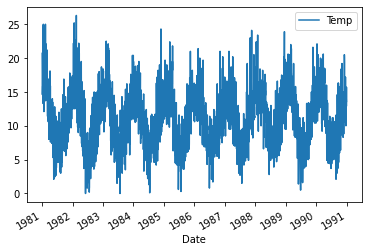

In [ ]:
temperature_df_date_with_index.plot()

# 3. Create a dataset with group of inputs of some size (between 10 and 50)

In [ ]:
def sliding_windows(x, size):
  for s in range(1, (size + 1)):
    x['shift_{}'.format(s)] = x['Temp'].shift(s)

In [ ]:
sliding_windows(temperature_df_date_with_index, 12)
temperature_df_date_with_index

,Temp,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Date,,,,,,,,,,,,,
1981-01-01,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-03,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-04,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9,13.6,13.4
1990-12-28,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9,13.6
1990-12-29,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9


In [ ]:
trainable_temperatures = temperature_df_date_with_index.dropna()
# inplace = True

In [ ]:
trainable_temperatures

,Temp,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Date,,,,,,,,,,,,,
1981-01-13,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7
1981-01-14,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9
1981-01-15,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8
1981-01-16,20.7,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6
1981-01-17,20.6,20.7,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9,13.6,13.4
1990-12-28,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9,13.6
1990-12-29,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4,14.7,17.2,13.9


# 4. Split the data into train and test

In [ ]:
split_date = pd.Timestamp('01-01-1989')
train_temperatures = trainable_temperatures.loc[:split_date,]
test_temperatures = trainable_temperatures.loc[split_date:]

In [ ]:
train_temperatures.shape, test_temperatures.shape

((2909, 13), (730, 13))

In [ ]:
X_train_with_index = train_temperatures.drop('Temp', axis=1)
y_train_with_index = train_temperatures[['Temp']]

X_test_with_index = test_temperatures.drop('Temp', axis=1)
y_test_with_index = test_temperatures[['Temp']]

In [ ]:
X_train_with_index

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Date,,,,,,,,,,,,
1981-01-13,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7
1981-01-14,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9
1981-01-15,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8
1981-01-16,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6
1981-01-17,20.7,25.0,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8
...,...,...,...,...,...,...,...,...,...,...,...,...
1988-12-27,9.5,15.8,19.8,17.3,15.2,11.9,13.6,14.9,17.5,16.6,23.9,20.7
1988-12-28,12.9,9.5,15.8,19.8,17.3,15.2,11.9,13.6,14.9,17.5,16.6,23.9
1988-12-29,12.9,12.9,9.5,15.8,19.8,17.3,15.2,11.9,13.6,14.9,17.5,16.6


In [ ]:
y_train_with_index

,Temp
Date,
1981-01-13,16.7
1981-01-14,21.5
1981-01-15,25.0
1981-01-16,20.7
1981-01-17,20.6
...,...
1988-12-27,12.9
1988-12-28,12.9
1988-12-29,14.8


In [ ]:
X_train_values = X_train_with_index.values
X_test_values = X_test_with_index.values

y_train_values = y_train_with_index.values
y_test_values = y_test_with_index.values

X_train_values.shape, X_test_values.shape, y_train_values.shape, y_test_values.shape

((2909, 12), (730, 12), (2909, 1), (730, 1))

# 5. Use 1 different RNN type

In [ ]:
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Dense, TimeDistributed, GRU, Conv1D
import keras.backend as K

In [ ]:
X_train = X_train_values.reshape(X_train_values.shape[0], 12, 1)
X_test = X_test_values.reshape(X_test_values.shape[0], 12, 1)

X_train.shape

(2909, 12, 1)

In [ ]:
y_train_values.shape

(2909, 1)

#### Baseline Metrics

In [ ]:
# naive forecasting
y_pred = X_test[:, -1]
np.mean(keras.losses.mean_squared_error(y_test_values, y_pred))

13.045561643835617

In [ ]:
model_for_baseline = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[12, 1]),
  keras.layers.Dense(1)
])

model_for_baseline.compile(loss='mean_squared_error', optimizer='adam')
model_for_baseline.fit(X_train, y_train_values, epochs=20)
model_for_baseline.evaluate(X_test, y_test_values)

Epoch 1/20
91/91 [==============================] - 0s 2ms/step - loss: 53.5425
Epoch 2/20
91/91 [==============================] - 0s 2ms/step - loss: 18.8448
Epoch 3/20
91/91 [==============================] - 0s 2ms/step - loss: 18.0375
Epoch 4/20
91/91 [==============================] - 0s 2ms/step - loss: 17.5094
Epoch 5/20
91/91 [==============================] - 0s 2ms/step - loss: 16.9178
Epoch 6/20
91/91 [==============================] - 0s 1ms/step - loss: 16.2795
Epoch 7/20
91/91 [==============================] - 0s 2ms/step - loss: 15.6228
Epoch 8/20
91/91 [==============================] - 0s 2ms/step - loss: 14.9797
Epoch 9/20
91/91 [==============================] - 0s 2ms/step - loss: 14.3507
Epoch 10/20
91/91 [==============================] - 0s 2ms/step - loss: 13.7112
Epoch 11/20
91/91 [==============================] - 0s 2ms/step - loss: 13.0958
Epoch 12/20
91/91 [==============================] - 0s 2ms/step - loss: 12.5217
Epoch 13/20
91/91 [==================

7.343539237976074

#### Model

In [ ]:
K.clear_session()
inputs = keras.Input(shape=[None, 1])
conv_1 = Conv1D(filters=20, kernel_size=4, strides=2, padding='valid')(inputs)
gru_1 = GRU(20, return_sequences=True)(conv_1)
gru_2 = GRU(20, return_sequences=True)(gru_1)
output = TimeDistributed(Dense(1))(gru_2)

model = Model(inputs, output)

model.compile(loss="mse", optimizer=keras.optimizers.Adam(lr=0.01))

model.fit(X_train, y_train_values, epochs=20)
model.evaluate(X_test, y_test_values)


Epoch 1/20
91/91 [==============================] - 0s 4ms/step - loss: 27.8872
Epoch 2/20
91/91 [==============================] - 0s 4ms/step - loss: 15.4345
Epoch 3/20
91/91 [==============================] - 0s 4ms/step - loss: 10.8265
Epoch 4/20
91/91 [==============================] - 0s 4ms/step - loss: 7.6669
Epoch 5/20
91/91 [==============================] - 0s 4ms/step - loss: 6.9347
Epoch 6/20
91/91 [==============================] - 0s 5ms/step - loss: 6.6833
Epoch 7/20
91/91 [==============================] - 0s 4ms/step - loss: 6.8118
Epoch 8/20
91/91 [==============================] - 0s 5ms/step - loss: 6.7138
Epoch 9/20
91/91 [==============================] - 0s 4ms/step - loss: 6.9139
Epoch 10/20
91/91 [==============================] - 0s 4ms/step - loss: 6.8340
Epoch 11/20
91/91 [==============================] - 0s 4ms/step - loss: 6.5543
Epoch 12/20
91/91 [==============================] - 0s 5ms/step - loss: 6.5084
Epoch 13/20
91/91 [===========================

4.955042839050293